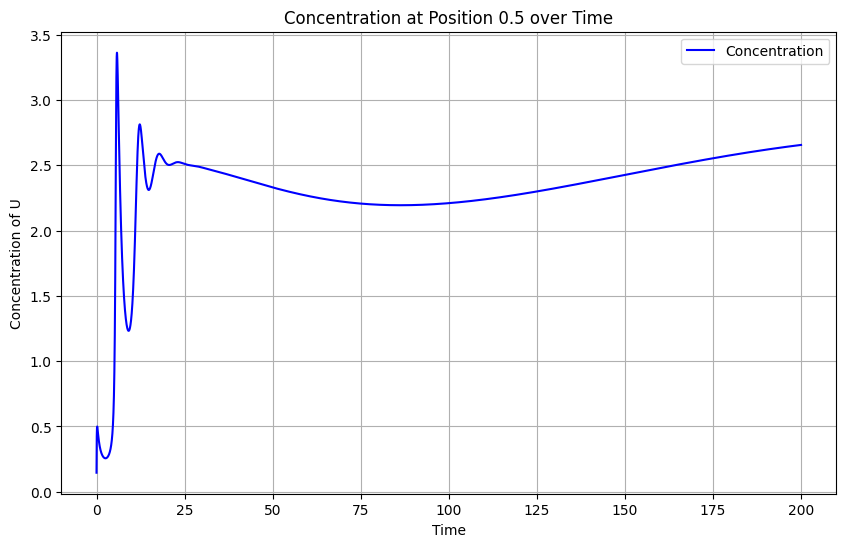

In [2]:
import numpy as np
import matplotlib.pyplot as plt

D1 = 1.0
a = 0.1
b = 0.9
size = 500

T = 200.0
dt = 0.001
dx = (dt / 0.005) ** 0.5
n = int(T / dt)

def laplacian1D(Z):
    Zleft = np.roll(Z, 1)
    Zright = np.roll(Z, -1)
    laplacian = (Zleft + Zright - 2 * Z) / (dx ** 2)
    laplacian[0] = 0
    laplacian[-1] = 0
    return laplacian

# Define the spatial grid
L = 1
x = np.linspace(0, L, size)

U = np.random.rand(size)
V = np.random.rand(size)

# Choose a specific position where you want to observe the concentration over time
position_to_observe = 0.5  # Adjust this to the desired position

# Initialize an array to store the concentration at the chosen position over time
concentration_at_position = []

for i in range(n):
    deltaU = laplacian1D(U)
    deltaV = laplacian1D(V)

    Uc = U[:]
    Vc = V[:]

    # Update D1 using the formula you provided
    D2 = 20 * (2 + np.cos(np.pi * x / L))

    U, V = \
        Uc + dt * (D1 * deltaU + a - Uc + Uc ** 2 * Vc), \
        Vc + dt * (D2 * deltaV + b - Uc ** 2 * Vc)
    U[0] = U[1]
    U[-1] = U[-2]
    V[0] = V[1]
    V[-1] = V[-2]
    
    # Append the concentration at the chosen position to the array
    concentration_at_position.append(U[int(position_to_observe * (size - 1))])

# Create a time array
time = np.linspace(0, T, n)

# Plot the concentration at the chosen position over time
plt.figure(figsize=(10, 6))
plt.plot(time, concentration_at_position, label='Concentration', color='b')
plt.xlabel('Time')
plt.ylabel('Concentration of U')
plt.title(f'Concentration at Position {position_to_observe} over Time')
plt.legend()
plt.grid(True)
plt.show()
